# Hypothesis Testing - Single Sample Population Mean

### Objective
The aim is to perform hypothesis testing on a population mean (in the case where the true standard deviation σ is known and when it is unknown) and assess whether the observed data provides sufficient evidence to accept or reject a null hypothesis regarding the population mean.

## 1. Test Procedure
1. Formulating Hypotheses:

    - **Null Hypothesis $H_0$:** The population mean is equal to the specified value.
    - **Alternative Hypothesis $H_1$:** The population mean is not equal to the specified value.
    
2. Generate a sample from a known distribution.
3. Choose a significance level alpha (commonly 0.05), which represents the probability of rejecting
the null hypothesis when it is true.
4. Compute the test statistic (e.g., Z-statistic or t-statistic) using the sample data and the assumed or
known population standard deviation.
5. Establish the critical region(s) based on the chosen significance level and the distribution of the
test statistic (e.g., using critical values from standard normal or t-distribution tables).
6. Compare the calculated test statistic with critical values to make a decision to either reject or fail
to reject the null hypothesis.

#### Z-Statistic
The Z-statistic is used when the population standard deviation ($\sigma$) is known, and the sample size is large (typically $n > 30$).

$$ Z = \frac{\bar{X} - \mu_0}{\frac{\sigma}{\sqrt{n}}} $$

where:
- $\bar{X}$ is the sample mean.
- $\mu_0$ is the hypothesized population mean.
- $\sigma$ is the population standard deviation.
- $n$ is the sample size.

#### t-Statistic
The t-statistic is used when the population standard deviation ($\sigma$) is unknown and the sample size is small (typically $n \leq 30$).

$$ t = \frac{\bar{X} - \mu_0}{\frac{s}{\sqrt{n}}} $$

where:
- $\bar{X}$ is the sample mean.
- $\mu_0$ is the hypothesized population mean.
- $s$ is the sample standard deviation.
- $n$ is the sample size.

In [22]:
import numpy as np
import pandas as pd
from scipy.stats import norm, t
import matplotlib.pyplot as plt

np.random.seed(42)
plt.style.use("fivethirtyeight")

In [23]:
### Parameters

mu = 10  # Actual mean
sigma = 3  # Population standard deviation
mu_0 = 10  # Hypothesized mean
alpha = 0.05
sample_sizes = [10, 20, 100]

In [24]:
### Functions to perform the test

def hypothesis_test_known_sigma(N, mu, sigma, mu_0, alpha):
    # Generate sample
    sample = np.random.normal(mu, sigma, N)
    sample_mean = np.mean(sample)
    z_stat = (sample_mean - mu_0) / (sigma / np.sqrt(N))
    p_value = 2 * (1 - norm.cdf(abs(z_stat)))
    critical_value = norm.ppf(1 - alpha / 2)
    return sample_mean, z_stat, p_value, critical_value

def hypothesis_test_unknown_sigma(N, mu, mu_0, alpha):
    # Generate sample
    sample = np.random.normal(mu, sigma, N)
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1)
    t_stat = (sample_mean - mu_0) / (sample_std / np.sqrt(N))
    p_value = 2 * (1 - t.cdf(abs(t_stat), df=N-1))
    critical_value = t.ppf(1 - alpha / 2, df=N-1)
    return sample_mean, t_stat, p_value, critical_value

In [25]:
results = []

for N in sample_sizes:
    mean_known, z_stat, p_value_z, crit_z = hypothesis_test_known_sigma(N, mu, sigma, mu_0, alpha)
    mean_unknown, t_stat, p_value_t, crit_t = hypothesis_test_unknown_sigma(N, mu, mu_0, alpha)
    results.append([N, f"{-crit_z:.2f}, {crit_z:.2f}", z_stat, p_value_z, 
                        f"{-crit_t:.2f}, {crit_t:.2f}", t_stat, p_value_t])

columns = ["N", "Non-rejection region (Z)", "Z statistic", "p-value (Z)", 
           "Non-rejection region (T)", "T statistic", "p-value (T)"]

df = pd.DataFrame(results, columns=columns)
df

,N,Non-rejection region (Z),Z statistic,p-value (Z),Non-rejection region (T),T statistic,p-value (T)
0,10,"-1.96, 1.96",1.416894,0.156514,"-2.26, 2.26",-3.310206,0.009081
1,20,"-1.96, 1.96",-1.189477,0.234252,"-2.09, 2.09",-0.145414,0.885915
2,100,"-1.96, 1.96",-0.153700,0.877846,"-1.98, 1.98",1.248412,0.214824


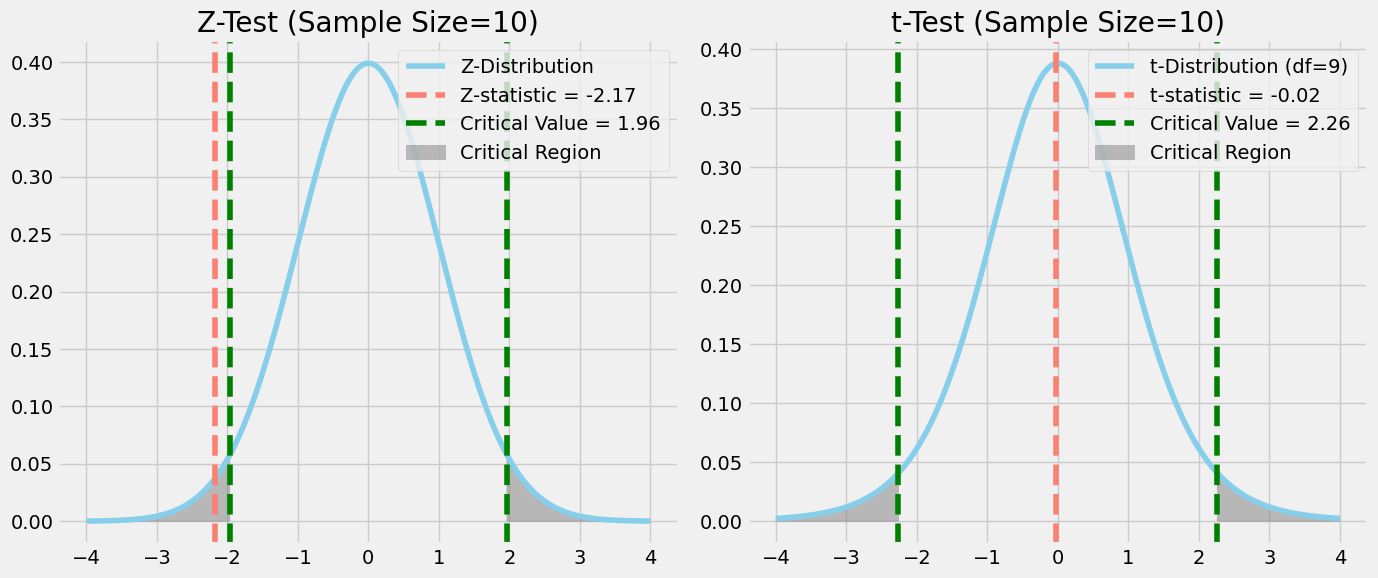

In [26]:
### Visualization for the first sample size as an example

N = sample_sizes[0]
mean_known, z_stat, p_value_z, crit_z = hypothesis_test_known_sigma(N, mu, sigma, mu_0, alpha)
mean_unknown, t_stat, p_value_t, crit_t = hypothesis_test_unknown_sigma(N, mu, mu_0, alpha)

x = np.linspace(-4, 4, 1000)
y_z = norm.pdf(x)
y_t = t.pdf(x, df=N-1)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(x, y_z, label='Z-Distribution', color="skyblue")
plt.axvline(z_stat, color='salmon', linestyle='--', label=f'Z-statistic = {z_stat:.2f}')
plt.axvline(crit_z, color='g', linestyle='--', label=f'Critical Value = {crit_z:.2f}')
plt.axvline(-crit_z, color='g', linestyle='--')
plt.fill_between(x, 0, y_z, where=(x < -crit_z) | (x > crit_z), color='gray', alpha=0.5, label='Critical Region')
plt.title(f'Z-Test (Sample Size={N})')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, y_t, label=f't-Distribution (df={N-1})', color="skyblue")
plt.axvline(t_stat, color='salmon', linestyle='--', label=f't-statistic = {t_stat:.2f}')
plt.axvline(crit_t, color='g', linestyle='--', label=f'Critical Value = {crit_t:.2f}')
plt.axvline(-crit_t, color='g', linestyle='--')
plt.fill_between(x, 0, y_t, where=(x < -crit_t) | (x > crit_t), color='gray', alpha=0.5, label='Critical Region')
plt.title(f't-Test (Sample Size={N})')
plt.legend()

plt.tight_layout()
plt.show()